In [96]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt

In [97]:
n_iter = 1_000
n_samples = 1_000

x_upper = 1
x_lower = 0

V = x_upper - x_lower

In [98]:
def eq(x):
    return np.exp(-1 * (x ** 2) / 2)

In [99]:
estimates = []

# Monte Carlo simulation
for i in tqdm(range(n_iter)):
    x = np.random.uniform(x_lower, x_upper, n_samples)  # Generate random samples
    f_x = eq(x)  # Evaluate the function
    integral_estimate = V * np.mean(f_x)  # Monte Carlo estimate for this iteration
    estimates.append(integral_estimate)

100%|██████████| 1000/1000 [00:00<00:00, 23307.52it/s]


In [100]:
# Final results
mean_estimate = np.mean(estimates)
std_dev_estimate = np.std(estimates)

print(f"Monte Carlo Estimate: {mean_estimate:.4f}")
print(f"Standard Deviation: {std_dev_estimate:.4f}")

Monte Carlo Estimate: 0.8554
Standard Deviation: 0.0040


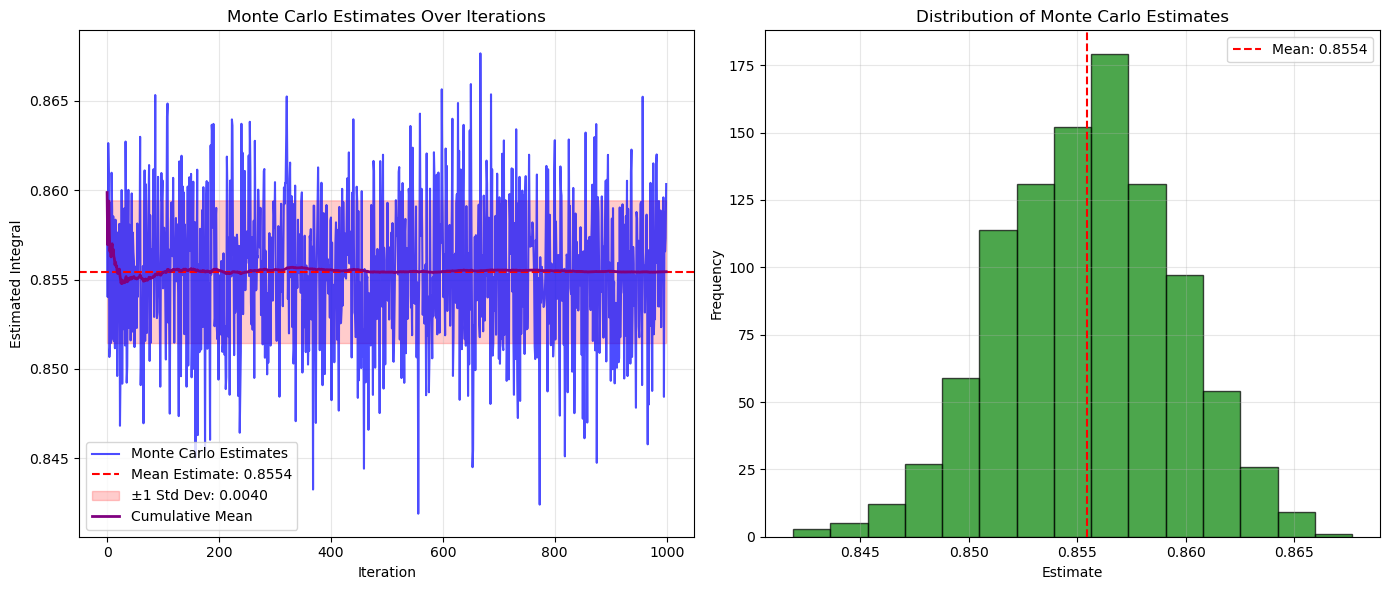

In [101]:
# Calculate the cumulative mean at each iteration
cumulative_mean = np.cumsum(estimates) / np.arange(1, n_iter + 1)

# Visualization
plt.figure(figsize=(14, 6))

# Time-series plot of estimates
plt.subplot(1, 2, 1)
plt.plot(estimates, label='Monte Carlo Estimates', color='blue', alpha=0.7)
plt.axhline(y=mean_estimate, color='red', linestyle='--', label=f'Mean Estimate: {mean_estimate:.4f}')
plt.fill_between(range(n_iter), 
                 mean_estimate - std_dev_estimate, 
                 mean_estimate + std_dev_estimate, 
                 color='red', alpha=0.2, label=f'±1 Std Dev: {std_dev_estimate:.4f}')
plt.plot(cumulative_mean, label='Cumulative Mean', color='purple', linewidth=2)
plt.title('Monte Carlo Estimates Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Estimated Integral')
plt.legend()
plt.grid(alpha=0.3)

# Histogram of estimates
plt.subplot(1, 2, 2)
plt.hist(estimates, bins=15, color='green', alpha=0.7, edgecolor='black')
plt.axvline(mean_estimate, color='red', linestyle='--', label=f'Mean: {mean_estimate:.4f}')
plt.title('Distribution of Monte Carlo Estimates')
plt.xlabel('Estimate')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()